In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#loading all necessary libraries
import numpy as np
import pandas as pd

import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# Loading the dataset
df=pd.read_csv('C:/Users/oi00326/Downloads/Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [3]:
#checking the first five columns
df.iloc[:,6:9]

,Score,Time,Summary
0,5,1303862400,Good Quality Dog Food
1,1,1346976000,Not as Advertised
2,4,1219017600,"""Delight"" says it all"
3,2,1307923200,Cough Medicine
4,5,1350777600,Great taffy
...,...,...,...
568449,5,1299628800,Will not do without
568450,2,1331251200,disappointed
568451,5,1329782400,Perfect for our maltipoo
568452,5,1331596800,Favorite Training and reward treat


In [4]:
#### Building a word cloud for total positive score reviews
product_score= df[df.Score ==1 ]
print('Total Negative score is:',product_score.shape)

Total Negative score is: (52268, 10)


In [5]:
Reviews= product_score['Summary'].str.lower()
Reviews.head()

1                        not as advertised
12    my cats are not fans of the new food
26                         nasty no flavor
50                           don't like it
62                          stale product.
Name: Summary, dtype: object

In [7]:
Total_Reviews = Reviews.str.split(' ')
Total_Reviews.head()

1                              [not, as, advertised]
12    [my, cats, are, not, fans, of, the, new, food]
26                               [nasty, no, flavor]
50                                 [don't, like, it]
62                                 [stale, product.]
Name: Summary, dtype: object

In [8]:
import string

Cleaned_Total_Reviews = []
for review in Total_Reviews:
    cleaned_review = [x.strip(string.punctuation) for x in review]
    Cleaned_Total_Reviews.append(cleaned_review)

review_summary = [" ".join(review) for review in Cleaned_Total_Reviews]
Total_summary = "\n".join(review_summary)

print(Total_summary[:500])

not as advertised
my cats are not fans of the new food
nasty no flavor
don't like it
stale product
warning  warning  alcohol sugars
no tea flavor
bad
rip off price
tasteless but low calorie
very low quality
not banana runts
these just don't do it for me as breath mints
changed formula makes cats sick
price cannot be correct
not good
furniture polish taste
sad outcome
don't waste your money
reeks like chemicals
lie
over priced chips and lack rice taste
so awful i can barely describe
very dissapoi


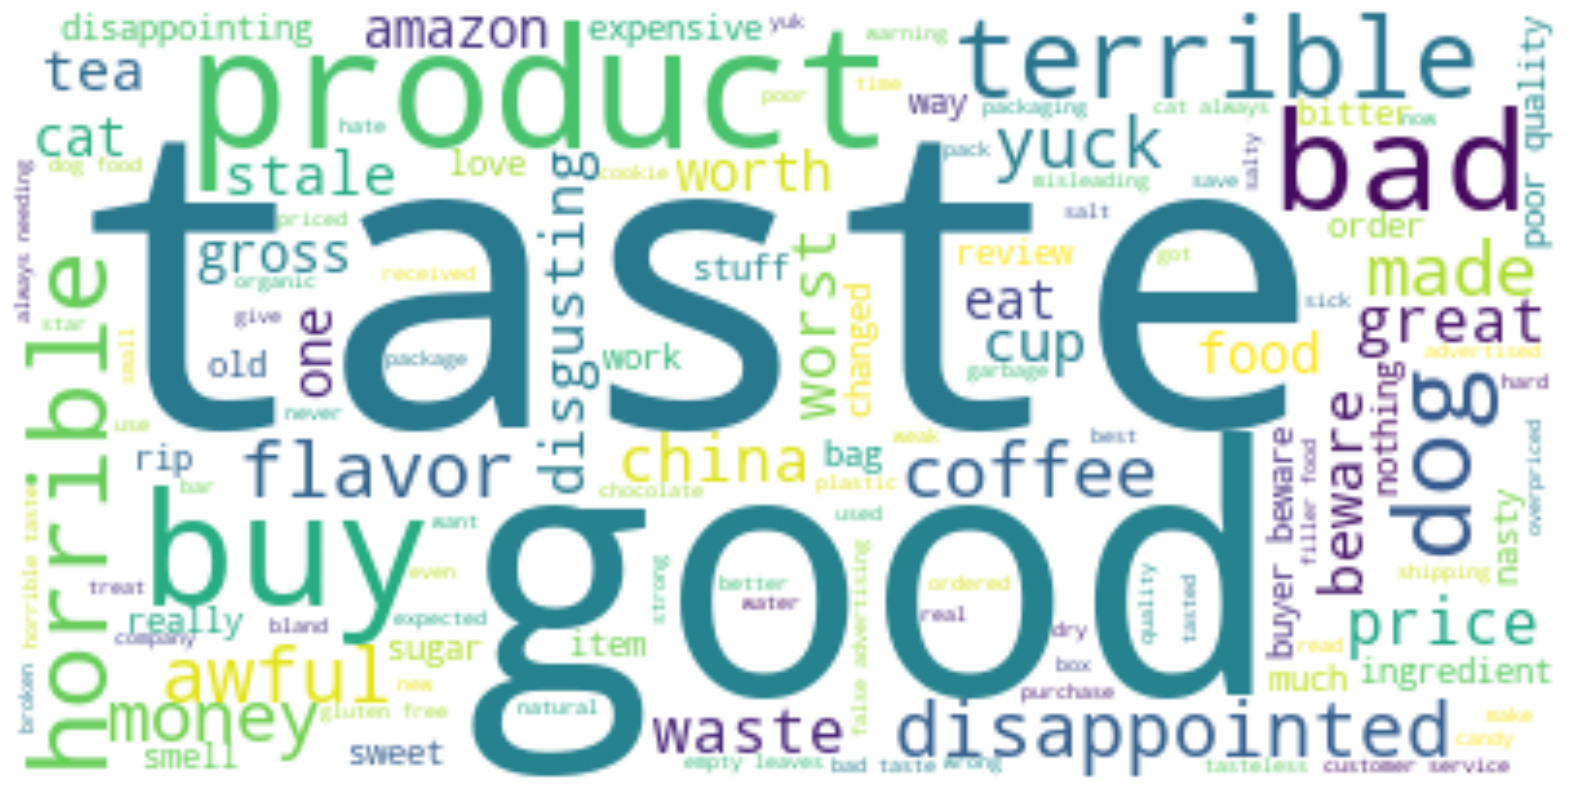

In [9]:
wordcloud_reviews = WordCloud (background_color = 'white').generate(Total_summary)
#Lines length
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_reviews, interpolation = 'bilinear')
plt.axis('off')
plt.show()

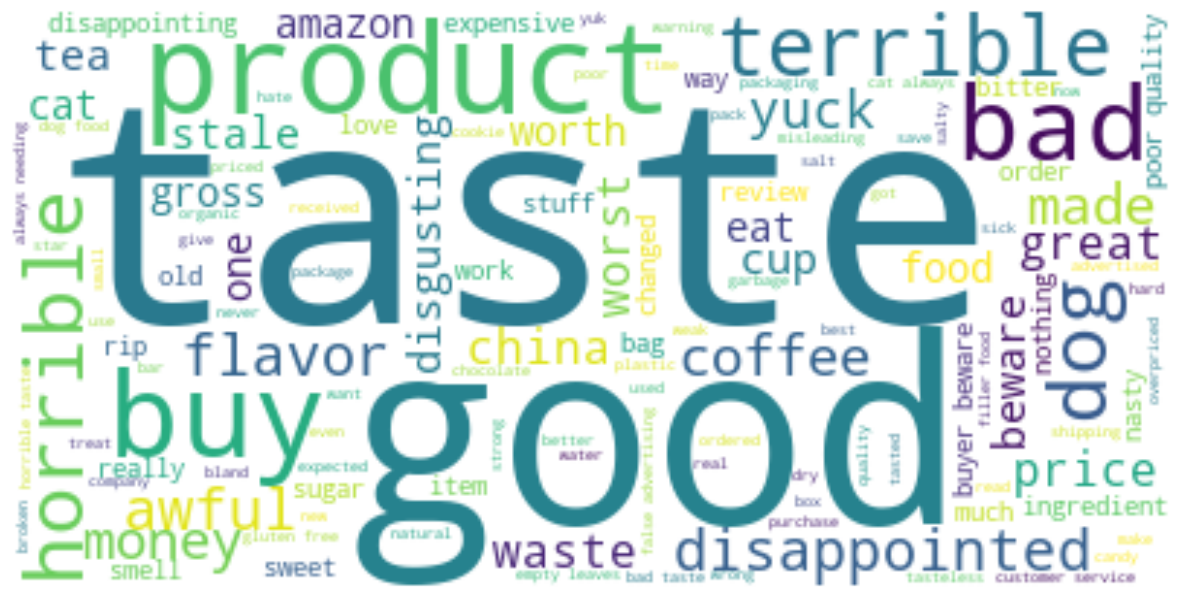

In [14]:
stopwords = set(STOPWORDS)
stopwords.update(["taste","good","product","great","sweet","sugar","changed"])

wordcloud_spam = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=100).generate(Total_summary)

# Lines 4 to 7
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_reviews,interpolation ="bilinear")
plt.axis("off")
plt.show()